## Exercise 05

# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.

## Using Keras
-------------------

### En esta primera parte definimos las caracteristicas que van a definir nuestros personajes y por tanto las reacciones posibles.

| Caracteristicas  | Reacciones | Personajes  |
| ---------------- |:----------:| -----------:|
| Big Ears         | Scream     |  Lobo       |
| Big teeth        | Hug        |  Abuela     |
| Handsome         | Food       |  Cazador    |
| Wrinkled         | kiss       |             |

La presencia de cualquiera de estas caracteristicas va a determinar con un 1 y la ausencia con un 0. Una persona apuesta y arrugada, caperucita deberia abrazar y besar, seria representada así:
                                
                                [0,0,1,1] ----> [0,0,1,1]

In [6]:

import numpy as np

#input dataset
x_train = np.array([ [1,1,0,0],[0,1,1,0],[0,0,0,1],[1,0,0,0] ])
#columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled']

#input test
x_test = np.array([ [1,1,0,0],[0,0,1,0]])


#output dataset
y_train = np.array([ [1,0,0,0],[0,0,1,1],[0,1,1,0],[1,0,0,0] ])
#columns=['Scream', 'Hug', 'Food', 'Kiss']

#Ouput esperado para test
y_test = np.array([ [1,1,0,0],[0,0,1,1] ])

### A continuación se definen los parametros de nuestra red neuronal y se importan las librerías necesarias.

Como los vectores de entrada tienen 4 "parámetros" la red se configura así. En este caso la red neuronal solo se hizo con densidad 1 y los "parámetros" de salida también son 4 como se mencionó anteriormente.

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=1, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(units=4))
model.add(Activation('sigmoid'))

model.summary(70)


C:\Users\ladyd\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_1 (Dense)                (None, 1)                   5          
______________________________________________________________________
activation_1 (Activation)      (None, 1)                   0          
______________________________________________________________________
dense_2 (Dense)                (None, 4)                   8          
______________________________________________________________________
activation_2 (Activation)      (None, 4)                   0          
Total params: 13
Trainable params: 13
Non-trainable params: 0
______________________________________________________________________


### En esta parte se procede a entrenar el modelo con los datos de entrenamiento que suministramos arriba.

Los datos de entrenamiento son modificables en x_train y y_train

In [7]:
from keras.optimizers import SGD
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=1, verbose=0)

### Finalmente procedemos a evaluar nuestro modelo con los datos de test y a medir el desempeño de las predicciones del mismo.

El modelo se evalua con los datos definidos en x_test y y_test y la medida de desempeño elegida por nosotros es el accuracy.




In [8]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 73ms/step
Test score: 0.7228691577911377
Test accuracy: 0.375


## Using Sklearn
-------------------

### Partimos de qué vamos a usar los mismos datos que usamos arriba para entrenar la función con Keras. 

### A continuación definimos la función sigmoid.

La función sigmoid es una función no lineal que mapea cualquier valor a un valor entre 0 y 1. Se usa basicamente para convertit números en probabilidades. Entre otras propiedades para el entrenamiento de redes neuronales.

In [5]:
# sigmoid function

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

### Entrenamiento de la red

La primera capa son los datos de entrenamiento de nuestra red. En este caso serian las 4 muestras. Todas se procesan al mismo tiempo, lo que se conoce como entrenamiento Full Batch.

Luego tratamos de predecir la salida dada una entrada. multiplicando l0 por syn0, pasa esta salida a traves de la funcion sigmoid.




In [11]:
np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((4,4)) - 1

for iter in range(100):
# forward propagation
    l0 = x_train
    l1 = nonlin(np.dot(l0,syn0))


### Ahora comparamos con nuestros datos de test.

In [16]:
# how much did we miss?

l1_error = y_train - l1


### Vericamos las predicciones realizadas.

In [17]:
# multiply how much we missed by the 
# slope of the sigmoid at the values in l1

l1_delta = l1_error * nonlin(l1,True)

# update weights

syn0 += np.dot(l0.T,l1_delta)
print("Output After Training:")
print(l1)

Output After Training:
[[0.29474597 0.40741215 0.16420732 0.33087873]
 [0.28639589 0.32350963 0.31236398 0.51538526]
 [0.35638354 0.68053573 0.27984616 0.58441763]
 [0.45860596 0.60841366 0.2689864  0.40243371]]


## 4.2 Importa la data y la convierte a un Data frame

In [12]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [5]:
data_boston=load_boston()

In [6]:
bostondf=pd.DataFrame(data_boston.data)

In [7]:
bostondf.columns=data_boston.feature_names

In [8]:
bostondf['MEDV']=data_boston.target

In [9]:
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [71]:
bostondf.shape

(506, 13)

### Se obtienen estadisticas para cada una de las variables 

In [21]:
bostondf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4.3 Analisis de las variables

In [24]:
bostondf_2=bostondf[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE','MEDV']]    

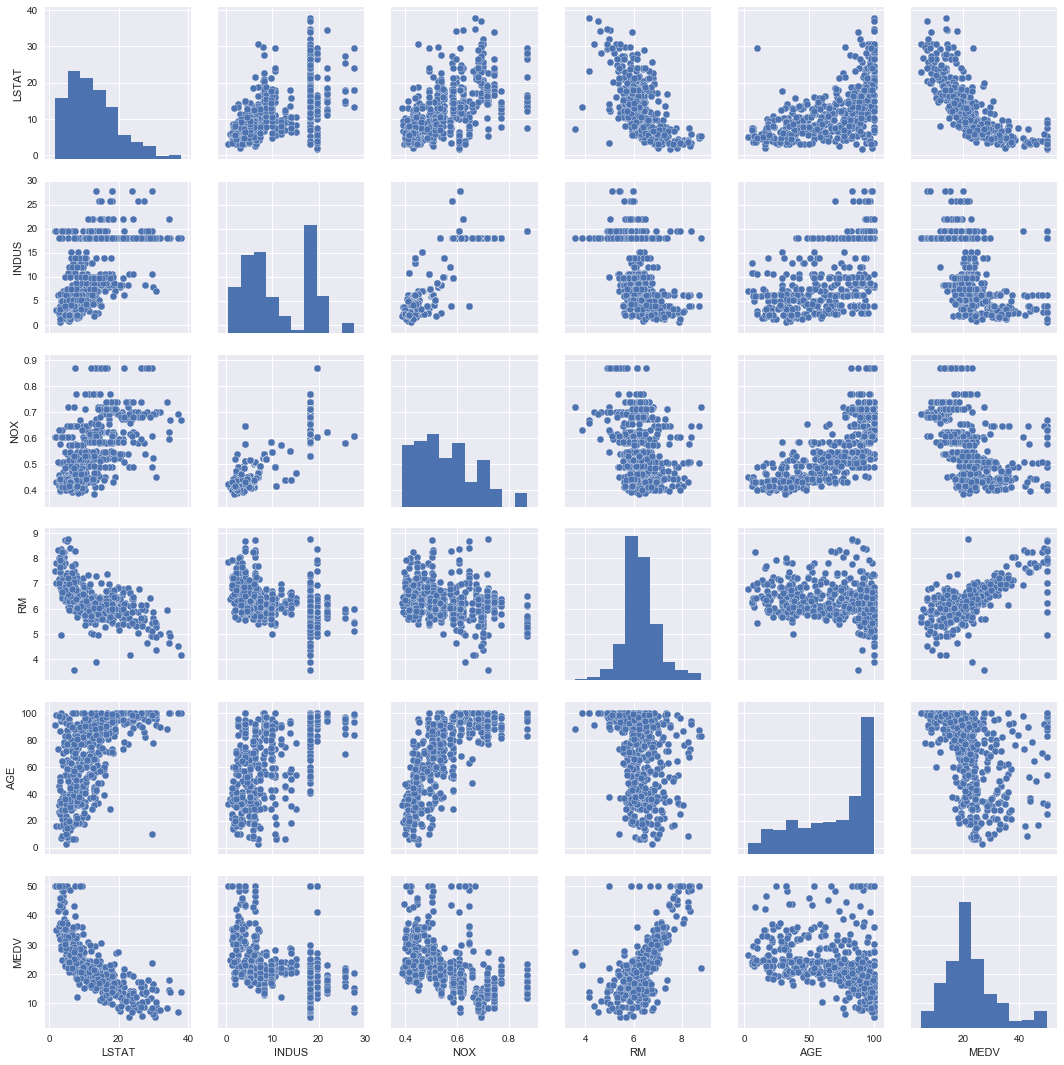

In [25]:
# Graficas de dispersión entre las variables
sns.pairplot(bostondf_2)
plt.show()

#### En las gráficas anteriores, se puede ver relaciones diferentes relaciones entre las variables, entre las mas visibles están:
#### Entre menos porcentaje de población de estrato bajo el precio de la vivienda es mayor.
#### Entre mayor numero de habitaciones por vivienda, mayor valor de la casa.

In [27]:
np.corrcoef(bostondf_2)


array([[ 1.        ,  0.99075004,  0.97819441, ...,  0.98581972,
         0.98307924,  0.95808787],
       [ 0.99075004,  1.        ,  0.94982287, ...,  0.99668853,
         0.99682335,  0.98682013],
       [ 0.97819441,  0.94982287,  1.        , ...,  0.94907484,
         0.942261  ,  0.89591008],
       ..., 
       [ 0.98581972,  0.99668853,  0.94907484, ...,  1.        ,
         0.99973225,  0.98987793],
       [ 0.98307924,  0.99682335,  0.942261  , ...,  0.99973225,
         1.        ,  0.99280619],
       [ 0.95808787,  0.98682013,  0.89591008, ...,  0.98987793,
         0.99280619,  1.        ]])

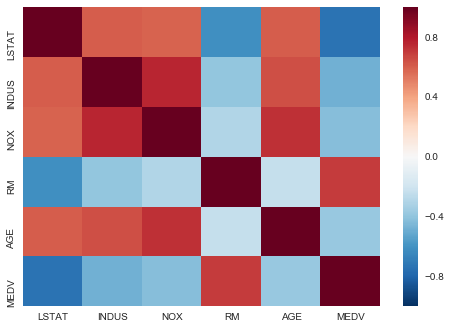

In [31]:
# BONUS
corr = bostondf_2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr
plt.show()

### Con la gráfica anterior, se puede ver que entre mas oscuro el color mayor porcentaje de correlacion entre las variables, por lo tanto, encontramos alto correlacion entre las variables NOX y INDUS, entre las variables AGE y NOX y entre la variable target MEDV y la variable RM.

## 4.4 Modelando relaciones lineales y no lineales

In [37]:
x1=bostondf[['RM']]
x2=bostondf[['LSTAT']]
y=bostondf[['MEDV']]

In [39]:
#Genera train y test
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=1)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.3, random_state=1)

In [41]:
lm1 = LinearRegression()
lm2 = LinearRegression()

lm1.fit(x1_train,y1_train)
lm2.fit(x2_train,y2_train)

y_pred1=lm1.predict(x1_test)
y_pred2=lm2.predict(x2_test)

mse1 = np.mean((y1_test-y_pred1)**2)
mse2 = np.mean((y2_test-y_pred2)**2)

In [43]:
print( "Mean squared error D1= ", mse1 )
print( "Mean squared error D2 = ", mse2 )

print( "Estimated intercept coeff D1 - w0: ", lm1.intercept_ )
print( "Coeffs D1 - w= ", lm1.coef_ )

print( "Estimated intercept coeff D2 - w0: ", lm2.intercept_ )
print( "Coeffs D2 - w= ", lm2.coef_ )

Estimated intercept coeff 1 - w0:  [-30.57103241]
Coeffs 1 - w=  [[ 8.46109164]]
Estimated intercept coeff 2 - w0:  [ 34.22183685]
Coeffs 2 - w=  [[-0.9166916]]
Mean squared error 1=  MEDV    36.517215
dtype: float64
Mean squared error 2 =  MEDV    42.620243
dtype: float64


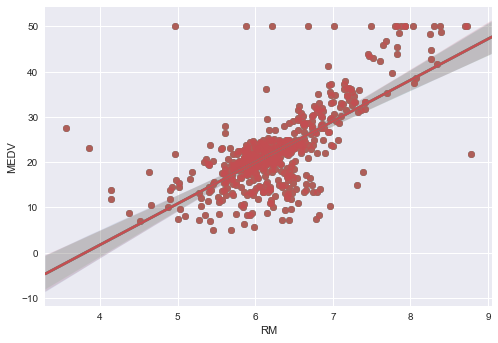

In [20]:
sns.regplot(x="RM", y="MEDV", data=bostondf)
plt.show()

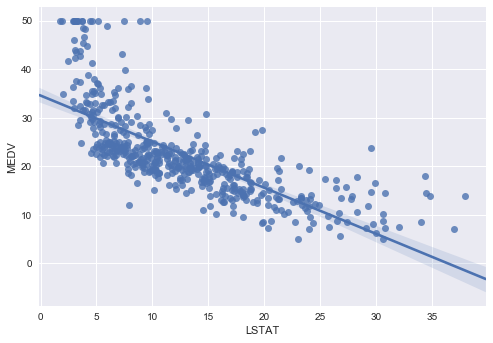

In [21]:
sns.regplot(x="LSTAT", y="MEDV", data=bostondf)
plt.show()

### El modelo D1 muestra una relacion positiva entre el numero de habitaciones por cada y el precio de las mismas. por cada habitacion el precio de la casa sube UDS 8461. Mientras que en D2 por cada aumento en el porcentaje de la poblacion de estratos bajo el prcio disminuye.

## 4.5 Modelar un modelo de regresion

In [10]:
x=bostondf
y=bostondf['MEDV']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [80]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)
                
mse = np.mean((y_test-y_pred)**2)
print( "Mean squared error= ", mse )

Mean squared error=  1.4936510354178448e-27


In [84]:
#MLPRegression
mlp=MLPRegressor()
mlp.fit(x_train,y_train)
y_predmlp=mlp.predict(x_test)
                
mse_mlp = np.mean((y_test-y_predmlp)**2)

print( "Mean squared error= ", mse_mlp )

Mean squared error=  942.5055882987093


In [15]:
# Se estandariza los predictores
sc_x = StandardScaler()
sc_x.fit(x)
x_train_s = sc_x.transform(x_train)
x_test_s = sc_x.transform(x_test)

In [16]:
#Regresion Lineal con la base estandarizada
lm_s = LinearRegression()
lm_s.fit(x_train_s,y_train)
y_pred_s=lm_s.predict(x_test_s)
                
mse_s = np.mean((y_test-y_pred_s)**2)
print( "Mean squared error estandarizado= ", mse_s )

Mean squared error estandarizado=  8.448804092404566e-28
